<a href="https://colab.research.google.com/github/dosanchez/data-science-learning/blob/main/exe_chpt_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
print(X.shape, y.shape)

(70000, 784) (70000,)


In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
y = y.astype(np.uint8)


In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
y_train_multilabel = (y_train == 0)
print (y_train_multilabel[:2])

for i in range(1,10):
  toadd = (y_train == i)
  y_train_multilabel = np.c_[y_train_multilabel, toadd]

print (y_train_multilabel[:2])

0    False
1     True
Name: class, dtype: bool
[[False False False False False  True False False False False]
 [ True False False False False False False False False False]]


In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_multilabel)

KNeighborsClassifier()

In [7]:
a = knn_clf.predict([X_train.iloc[1]])
print (a)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[ True False False False False False False False False False]]


In [8]:

from sklearn.model_selection import GridSearchCV
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]
searh = GridSearchCV(knn_clf, param_grid, cv=3, verbose=3, scoring="f1_macro")
searh.fit(X_train, y_train_multilabel)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ....n_neighbors=3, weights=uniform;, score=0.971 total time= 1.0min
[CV 2/3] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  57.6s
[CV 3/3] END ....n_neighbors=3, weights=uniform;, score=0.968 total time=  58.6s
[CV 1/3] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  48.8s
[CV 2/3] END ...n_neighbors=3, weights=distance;, score=0.969 total time=  48.4s
[CV 3/3] END ...n_neighbors=3, weights=distance;, score=0.968 total time=  48.5s
[CV 1/3] END ....n_neighbors=4, weights=uniform;, score=0.967 total time=  59.1s
[CV 2/3] END ....n_neighbors=4, weights=uniform;, score=0.966 total time=  58.0s
[CV 3/3] END ....n_neighbors=4, weights=uniform;, score=0.966 total time=  58.9s
[CV 1/3] END ...n_neighbors=4, weights=distance;, score=0.972 total time=  48.0s
[CV 2/3] END ...n_neighbors=4, weights=distance;, score=0.970 total time=  52.3s
[CV 3/3] END ...n_neighbors=4, weights=distance;,

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             scoring='f1_macro', verbose=3)

In [9]:
searh.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [10]:
searh.best_score_

np.float64(0.970814045890378)

In [11]:
np.shape(X_train)

(60000, 784)

In [12]:
aug_base = X_train.to_numpy().reshape(60000, 28, 28)

In [13]:
X_train_to_right = np.roll(aug_base, 1, axis=2)
X_train_to_left = np.roll(aug_base, -1, axis=2)
X_train_to_up = np.roll(aug_base, 1, axis=1)
X_train_to_down = np.roll(aug_base, -1, axis=1)

In [14]:
list_of_numbers = [aug_base, X_train_to_right, X_train_to_left, X_train_to_up, X_train_to_down]

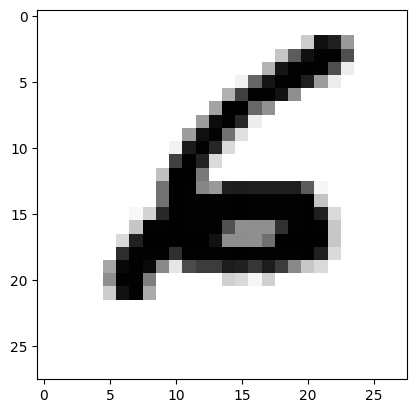

In [16]:
from IPython.display import clear_output
import random
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
for i in range(10):
  image = random.randint(0, 59999)
  for j in list_of_numbers:
    plt.imshow(j[image], cmap = mpl.cm.binary, interpolation = "nearest")
    #plt.axis("off")
    plt.show()
    time.sleep(0.5)
    # Clear the output of the current cell
    clear_output(wait=True)


In [23]:
X_train_aug = np.concatenate(tuple(list_of_numbers), axis = 0).reshape(300000, 784)
X_train_aug.shape

(300000, 784)

In [24]:
y_train_aug = np.repeat(y_train.to_numpy(), 5, axis = 0)
y_train_aug.shape

(300000,)

In [25]:
y_train_multilabel_aug = (y_train_aug == 0)
print (y_train_multilabel_aug[:2])

for i in range(1,10):
  toadd = (y_train_aug == i)
  y_train_multilabel_aug = np.c_[y_train_multilabel_aug, toadd]

print (y_train_multilabel_aug[:2])

[False False]
[[False False False False False  True False False False False]
 [False False False False False  True False False False False]]


In [26]:
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]
searh = GridSearchCV(knn_clf, param_grid, cv=3, verbose=3, scoring="f1_macro")
searh.fit(X_train, y_train_multilabel)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ....n_neighbors=3, weights=uniform;, score=0.971 total time= 1.1min
[CV 2/3] END ....n_neighbors=3, weights=uniform;, score=0.969 total time= 1.0min
[CV 3/3] END ....n_neighbors=3, weights=uniform;, score=0.968 total time= 1.0min
[CV 1/3] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  51.2s
[CV 2/3] END ...n_neighbors=3, weights=distance;, score=0.969 total time=  50.1s
[CV 3/3] END ...n_neighbors=3, weights=distance;, score=0.968 total time=  48.9s
[CV 1/3] END ....n_neighbors=4, weights=uniform;, score=0.967 total time= 1.0min
[CV 2/3] END ....n_neighbors=4, weights=uniform;, score=0.966 total time= 1.0min
[CV 3/3] END ....n_neighbors=4, weights=uniform;, score=0.966 total time= 1.0min
[CV 1/3] END ...n_neighbors=4, weights=distance;, score=0.972 total time=  50.1s
[CV 2/3] END ...n_neighbors=4, weights=distance;, score=0.970 total time=  50.2s
[CV 3/3] END ...n_neighbors=4, weights=distance;,

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             scoring='f1_macro', verbose=3)